In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
kanser = load_breast_cancer()

In [3]:
kanser.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(kanser.DESCR) # Veri setinin özet bilgilerine bakalım.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

* Veriseti gögüs kanseri tümör ölçümlerinden oluşuyor.
* Her bir tümör zararsız ve zararlı şeklinde etiketlenmiştir.
* 212 tane kanserli 357 tane zararsız tümör bulunuyormuş.

### Burada amacımız doku ölçümlerine göre bir tümörün kanserli olup olmadığını tahmin etmektir.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Öncelikle verisetimizi parçalayalım.
X_egitim, X_test, y_egitim, y_test = train_test_split(kanser.data,
                                                      kanser.target,
                                                      stratify = kanser.target,
                                                      random_state = 66)

In [26]:
# stratify parametresi, orijinal veri setinde olduğu gibi, tren ve test veri setlerinde de hedef oranını koruyacaktır.

In [27]:
egitim_dogruluk = []
test_dogruluk = []

* Model için kaç tane komşuluğun en iyi performansı sergileyeceğini bilmiyoruz. 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import scorer
import matplotlib.pyplot as plt

1 den 10 a kadar en yakın komşulukları görmek isteyelim

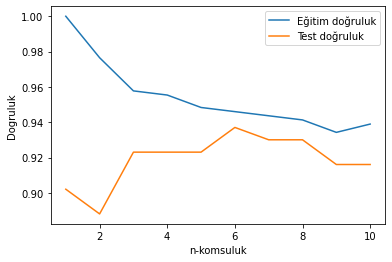

In [30]:
komsuluk_sayisi = range(1,11)

for n_komsuluk in komsuluk_sayisi:
    snf = KNeighborsClassifier(n_neighbors=n_komsuluk)
    snf.fit(X_egitim, y_egitim) # eğitim verilerini kullanarak modeli kuruyoruz.
    
    egitim_dogruluk.append(snf.score(X_egitim,y_egitim)) # eğitim verisine göre doğruluk oranlarını hesaplayalım. 
    test_dogruluk.append(snf.score(X_test,y_test))#modeli genelleştirmek için test verilerini kullanarak doğruluk oranlarını bulalım.
    
plt.plot(komsuluk_sayisi, egitim_dogruluk, label="Eğitim doğruluk")
plt.plot(komsuluk_sayisi, test_dogruluk, label="Test doğruluk")
plt.ylabel("Dogruluk")
plt.xlabel("n-komsuluk")
plt.legend()

## KNN - Regresyon

In [32]:
import mglearn

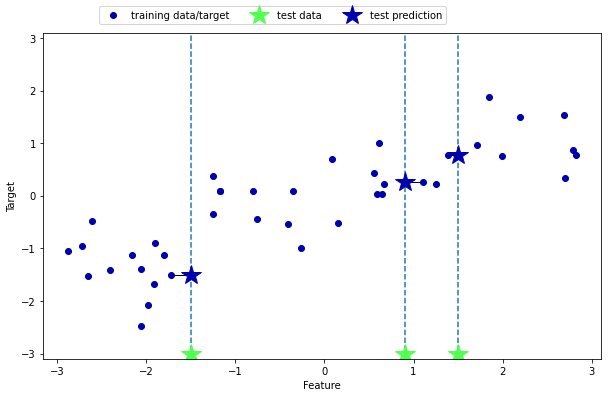

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

* mavi nokta: eğitim verileri
* yeşil yıldız : yeni eklenen verileri
* mavi yıldız : test verisinin tahmin verileri

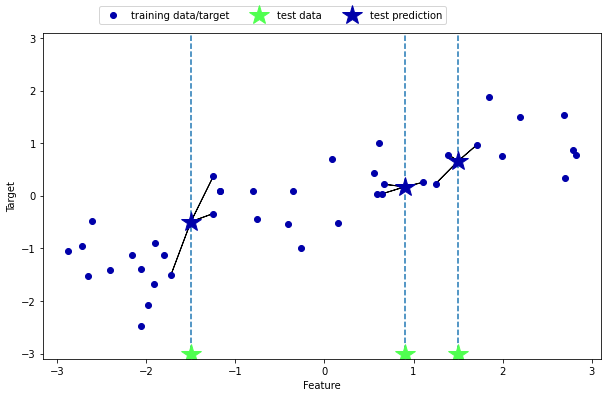

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3) # en yakın komşuluk değerini 3 e çıkaralım.

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
X,y = mglearn.datasets.make_wave(n_samples=40) # mglearn kütüphanesini kullanarak girdi ve çıktı verilerini oluşturalım.

In [41]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X,y,random_state=0) # train_test_split fonk. kulanarak eğitim ve test verilerini oluşturalım.

In [42]:
reg = KNeighborsRegressor(n_neighbors=3)

In [43]:
reg.fit(X_egitim,y_egitim) # EĞİTİM VERİLERİNİ KULLANARAK MODELİ OLUŞTURLALIM.

KNeighborsRegressor(n_neighbors=3)

In [45]:
reg.score(X_test,y_test) # TEST VERİLERİ İLE SCORE METODUNU KULLANARAK DOĞRULUK ORANINI EKRANA YAZDIRLAIM.

0.8344172446249605